In [1]:
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
from gurobipy import GRB
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
from tests.utils import *

## Master problem correctness

In [3]:
file_name = "test7_slack12"
n = 200
K = 5
seed = 5
l = 3
alpha = 1/2
beta = [1, 1, 1]
lower = 2
upper = n
M = 1e6
np.random.seed(seed)
labels = np.random.choice([0, 1, 2], p=[0.1, 0.2, 0.7], size=n)

X, Y, archetype = synthetic_data(n, K, seed)
_, _, q, clusters_init, _, t = initialize_clusters(
    X, K, l, alpha, beta, n, labels, M, lower, upper)

Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 2703.08it/s, Status=SUCCESS]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-08


In [11]:
pt = 1
(xc,yc) = (-1.744270101129342, 1.1794268573010105)
print(((X[pt][0] - xc) ** 2 + (X[pt][1] - yc) ** 2) ** 0.5)

8.274196594151562


In [44]:
old_dist_1 = [0.0, 7.707825939892317, 5.493892999494312, 4.523587051693442, 5.5300275452361305, 4.547665587119241, 6.817068876820428, 6.120203013768313, 6.147022195051055, 7.110347346803836, 5.678738236876461, 5.33291262755057, 6.809000572513938, 6.702686682772461, 7.128994171415653, 5.485685677787011, 6.42420577892201, 7.038789677345225, 5.696183641054587, 8.045320620285912, 0.16325638587582536, 6.334531159553402, 4.557942119103139, 5.782560030748108, 6.230420896559995, 5.1330283692380005, 0.0, 0.16325638587582536, 3.934890794503483, 0.16325638587582536, 3.3667372015852766, 4.22091061973528, 0.16325638587582536, 0.0, 0.16325638587582536, 3.2787878002035447, 0.0, 0.16325638587582536, 0.16325638587582536, 4.237707841848454, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 4.087260783240241, 0.16325638587582536, 0.16325638587582536, 3.822188119766786, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 6.34633466087771, 4.701152787483532, 5.815586407683742, 4.576458125228537, 3.697417704140641, 4.2570271841767875, 5.4650231529565705, 0.16325638587582536, 3.7958621354450477, 5.836446904190667, 4.45506488430009, 7.340092619829911, 0.16325638587582536, 0.16325638587582536, 3.264713645258979, 5.308424626755676, 5.8748989904515, 3.8177402021703255, 3.922196883045498, 6.03395321389405, 4.595429906380295, 0.16325638587582536, 4.482078118495322, 5.844716909730312, 0.16325638587582536, 5.621939349721949, 4.892831189718284, 0.16325638587582536, 4.65270549143287, 5.767585255238856, 4.411988340941775, 6.800862349800263, 0.16325638587582536, 4.143706219161011, 4.248074813478417, 5.611710149196985, 3.8285039415337447, 4.50560694589121, 6.390193846643549, 5.8165272968166, 3.4397172714124404, 0.16325638587582536, 4.537747308474167, 0.0, 0.16325638587582536, 3.480179639918523, 0.16325638587582536, 0.16325638587582536, 3.6392093531745773, 0.16325638587582536, 4.174237019244349, 3.6968660010583014, 0.16325638587582536, 0.16325638587582536, 3.619657330836385, 3.9111137416059463, 3.495416066482991, 0.16325638587582536, 4.236870855199206, 3.6865617267848014, 3.6232341636505305, 0.16325638587582536, 0.16325638587582536, 3.4944891245299043, 0.16325638587582536, 3.487787952369162, 0.16325638587582536, 3.471141472611814, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 3.2706354141181215, 0.16325638587582536, 0.16325638587582536, 3.9250562026955986, 3.9637498414976893, 3.9637843787448483, 3.61104164421374, 4.5561986877956535, 4.090802119733482, 4.298343121591031, 3.5988059052308405, 0.16325638587582536, 0.16325638587582536, 4.100890505432303, 3.2473282573522257, 0.16325638587582536, 3.380344693256891, 4.236820771784612, 3.965102161691444, 3.924645290516245, 3.467156239591479, 5.117876734258717, 0.16325638587582536, 6.925550887572527, 0.16325638587582536, 0.0, 3.6767165866296083, 3.2643224996985465, 5.008294061627813, 5.314243767271086, 4.173595406421376, 3.9123348611779245, 3.4729968533854003, 4.788173354121772, 5.24826332498338, 4.635264070201489, 4.400903584363258, 4.43200958053962, 5.232069279250577, 0.16325638587582536, 3.5078338993349107, 3.713291783994158, 4.214044578680281, 5.127719366653527, 5.32851799253387, 0.16325638587582536, 5.297913787275289, 5.169704259624934, 5.390622601555779, 4.050135439791695, 0.16325638587582536, 0.16325638587582536, 4.257786221643821, 4.258692922369958, 4.161002450762813, 3.891819498298042, 4.774869754164202, 5.296589097056413, 3.587795473443507, 4.5257424245169755, 3.434484583496101, 5.540743453074687, 5.651600198349177, 4.354556122728361, 3.244148552046023, 0.16325638587582536, 4.682972654948001, 0.16325638587582536, 3.836924792652387]
old_dist_2 = [0, 7.707825939890159, 5.493892999487558, 4.5235870516872705, 5.53002754524105, 4.547665587112176, 6.817068876819047, 6.120203013768749, 6.147022195047258, 7.110347346793775, 5.678738236871983, 5.3329126275462, 6.809000572507688, 6.702686682776699, 7.128994171410882, 5.485685677774476, 6.4242057789194655, 7.038789677339856, 5.696183641048594, 8.04532062028707, 1.920662624790803, 6.334531159551364, 4.557942119091128, 5.7825600307464065, 6.230420896556228, 5.133028369240734, 0, 1.9280672882954373, 3.934890794506782, 3.034191356351016, 3.366737201581955, 4.220910619737024, 3.130925906570547, 0, 2.6596045499120406, 3.278787800202242, 0, 2.690048168803443, 2.3645333820594754, 4.237707841837354, 1.8709265210485344, 1.1337287321522036, 2.0141469737769855, 2.15064434014506, 1.8271058225943533, 2.92793308425901, 2.9216487557708724, 2.7438478540260425, 2.43061502965234, 3.0032468162466355, 3.1658650021655594, 2.3630054386792425, 2.9559605510531526, 4.087260783234443, 2.201900886629706, 2.30275734083548, 3.822188119761303, 1.9412200175497512, 2.397219061954397, 2.666298406124079, 6.34633466088234, 4.701152787478519, 5.815586407682324, 4.576458125218463, 3.697417704141705, 4.257027184176806, 5.465023152951105, 1.9262319293342063, 3.7958621354446325, 5.83644690417967, 4.455064884289987, 7.340092619825788, 2.541120700607811, 1.9192625653336393, 3.2647136452471015, 5.30842462674623, 5.874898990440681, 3.817740202159932, 3.92219688303129, 6.033953213888267, 4.595429906373552, 3.1427458040568763, 4.482078118495782, 5.844716909726457, 2.2390276826578197, 5.621939349707758, 4.8928311897118295, 2.507751690053686, 4.6527054914237045, 5.767585255233068, 4.4119883409457605, 6.800862349805961, 2.379597994751982, 4.143706219126008, 4.24807481346277, 5.61171014919851, 3.828503941526025, 4.505606945877589, 6.390193846644768, 5.816527296819659, 3.4397172713989868, 2.767748556350492, 4.537747308459973, 0, 3.0924658008747, 3.4801796399399896, 1.6245157703822208, 2.7342341111471664, 3.639209353155226, 2.681850583326203, 4.174237019242908, 3.6968660010555774, 2.1331447291349446, 1.9583946025190553, 3.6196573308305093, 3.9111137416263215, 3.495416066466094, 2.175935535281735, 4.236870855197052, 3.6865617267822746, 3.623234163646917, 3.0372459731072277, 2.267630381628996, 3.4944891245221146, 1.2939566580370276, 3.4877879523635884, 2.5522658936582077, 3.471141472612134, 2.3136410795833187, 2.466547471088452, 2.58560516910043, 3.2706354141048726, 3.118838286757511, 2.8379916594476664, 3.9250562026923665, 3.96374984149847, 3.963784378759817, 3.6110416442322895, 4.5561986878024525, 4.090802119719025, 4.298343121584607, 3.5988059052329993, 2.42939249536456, 1.5456945443085335, 4.100890505436108, 3.247328257378236, 2.3701160388072617, 3.3803446932649104, 4.236820771761447, 3.965102161697117, 3.9246452905050226, 3.4671562395809827, 5.117876734255005, 3.152974046907732, 6.9255508875708305, 2.6990260217061928, 0, 3.676716586628044, 3.264322499678988, 5.008294061618656, 5.314243767260881, 4.173595406402152, 3.912334861151187, 3.4729968534047666, 4.78817335412246, 5.248263324981538, 4.635264070199073, 4.400903584355584, 4.4320095805339905, 5.232069279258973, 2.7787917505422612, 3.5078338993236264, 3.713291783989898, 4.214044578662545, 5.127719366648059, 5.32851799252866, 3.0485266202384818, 5.297913787260932, 5.169704259625023, 5.39062260155394, 4.0501354397791, 2.520598067945896, 2.7468666741520984, 4.257786221628247, 4.25869292235839, 4.161002450751996, 3.8918194982822647, 4.774869754166986, 5.296589097059917, 3.5877954734310697, 4.525742424510465, 3.4344845834743962, 5.540743453078028, 5.6516001983506605, 4.354556122716751, 3.2441485520358877, 2.786413044281187, 4.682972654938831, 3.148491405108796, 3.8369247926568737]
S = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [45]:
dist_gurobi = np.array(old_dist_1)
dist_recalc = np.array(old_dist_2)

In [46]:
np.argmax(dist_recalc - dist_gurobi)

50

In [47]:
dist_gurobi[50], dist_recalc[50]

(0.16325638587582536, 3.1658650021655594)

In [58]:
R = 0.16325

In [59]:
R ** 2

0.026650562500000002

In [60]:
cx, cy = (0.08331570474228736, 0.8024171295584471)
LHS =  - 1e+06 *S[50] + 5.699012446678714 * cx - 1.474705464127741 * cy + R ** 2 - cx ** 2 - cy ** 2
RHS = -999991.3366252317
print(LHS)

-1000001.3326758811


In [4]:
model = gp.read("./tests/model_write/" + file_name + "_out1000.lp")
constrs_len = len(model.getConstrs())
print(constrs_len)
clusters = np.loadtxt("./tests/model_matrix/"+file_name+"_clusters.txt")
distances = np.loadtxt("./tests/model_matrix/"+file_name+"_distances.txt")
slacks = np.loadtxt("./tests/model_matrix/"+file_name+"_slacks.txt")
solutions = np.loadtxt("./tests/model_matrix/"+file_name+"_solutions.txt")
objectives = np.loadtxt("./tests/model_matrix/"+file_name+"_objectives.txt")

Read LP format model from file ./tests/model_write/test7_slack12_out1000.lp
Reading time = 0.37 seconds
: 204 rows, 9587 columns, 794929 nonzeros
204


In [5]:
clusters = np.concatenate((clusters,np.ones(clusters.shape[0]).reshape(-1,1)),axis=1)
A = [[model.getCoeff(constr, var) for var in model.getVars()] for constr in model.getConstrs()]
b = [constr.rhs for constr in model.getConstrs()]
c = [var.obj for var in model.getVars()]
induced_mat = np.concatenate((clusters[:K,:],np.eye(constrs_len-1,constrs_len),clusters[K:,:]),axis=0).T
A = np.array(A)

In [6]:
A.shape

(204, 9587)

In [45]:
b

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [7]:
print(A[:20,:20])

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Compare the linear system of constraints from the last iteration of Gurobi with the cluster representations

In [8]:
np.allclose(induced_mat[:,:A.shape[1]],A)

True

In [9]:
dist_gurobi = np.array(c[:K] + c[K + constrs_len-1:])
dist_stored = np.array(distances)[:dist_gurobi.shape[0]]

Compare the coefficients of variables in the objective from the last iteration of Gurobi with the cluster representations

In [10]:
print(dist_stored)

[3409.05438148   68.29650393   17.20620399 ...  415.07182549  427.42892999
  427.84431451]


In [11]:
np.allclose(dist_gurobi,dist_stored)

True

Reoptimize the model using the Gurobi output of the master problem from the last iteration

In [12]:
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 204 rows, 9587 columns and 794929 nonzeros
Model fingerprint: 0x85c27925
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve time: 0.45s
Presolved: 204 rows, 9587 columns, 794929 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.065e+04
 Factor NZ  : 2.091e+04 (roughly 4 MB of memory)
 Factor Ops : 2.851e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.20714748e+06  0.00000

In [14]:
sol_num = 999

In [15]:
objectives[sol_num], model.ObjVal

(786.1297149421915, 786.129714942192)

In [16]:
last_sol_gurobi = [var.X for var in model.getVars()]
last_sol_gurobi_Z = last_sol_gurobi[:K] + last_sol_gurobi[K + constrs_len-1:]
last_sol_gurobi_slackness = last_sol_gurobi[K:K + constrs_len-1]

In [17]:
np.allclose(last_sol_gurobi_Z, solutions[sol_num][:len(last_sol_gurobi_Z)], atol = 1e-5)

True

check partition constraints

In [33]:
valid = True
for j in range(0,1000,20):
    partition_constr = [clusters[:solutions[j].shape[0],i] @ solutions[j] + slacks[j][i] for i in range(n)]
    valid = valid and (np.allclose(np.array(partition_constr),np.ones(n),rtol=1e-3))

In [19]:
print(partition_constr)

[1.00003, 1.0000126872938488, 1.00002, 1.00001, 1.0000099999999998, 1.00001, 1.0000156330806393, 1.00001, 1.0000200000000001, 1.00001, 1.00002, 1.0000099999999998, 1.0000229354506225, 1.00001, 1.0000095743134358, 1.00001, 1.00003, 1.00001, 1.00002, 1.0, 1.00001, 1.00001, 1.00001, 1.0000225943539045, 1.00002, 1.00003, 1.00001, 1.00004, 1.00004, 1.0000499999999999, 1.0000300000000002, 1.0000399999999998, 1.00004, 1.00006, 1.0000499999999999, 1.00002, 1.00003, 1.00003, 1.0000499999999999, 1.0000399999999998, 1.0000399999999998, 1.0000099999999998, 1.0000300000000002, 1.00003, 1.00003, 1.0000499999999999, 1.0000499999999999, 1.0000200000000001, 1.0000499999999999, 1.00004, 1.00003, 1.00001, 1.00003, 1.00004, 1.00003, 1.00004, 1.0000299999999998, 1.0000299999999998, 1.00004, 1.00003, 1.0000200000000001, 1.0000200000000001, 1.0000393463136177, 1.00001, 1.0000399999999998, 1.00003, 1.00001, 1.0000200000000001, 1.00004, 1.0000106460588811, 1.0000200000000001, 1.00001, 1.00004, 1.00002999999999

In [20]:
print(valid)

True


In [22]:
cluster_sizes = [sum(c[:n]) for c in clusters]

In [34]:
partition_constr_columns = []
for j in range(1000):
    partition_constr_columns.append(cluster_sizes[:len(solutions[j])] @ solutions[j] + sum(slacks[j][:n]))
print(partition_constr_columns)

[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0011733333334, 200.0011733333334, 199.99891, 199.9989767741936, 199.99926, 199.99863153846172, 199.99946294117655, 199.99964517241386, 200.00089727272737, 199.99943, 200.00077777777787, 199.99917228915666, 199.9994710112359, 200.0013503703704, 200.00071448430486, 200.00005324324326, 199.9986941025642, 199.99907588235288, 199.9980842857143, 200.00058559548683, 200.00319130434784, 200.0016850323974, 199.9976095758815, 199.999155104625, 199.9965794313528, 199.9985854018343, 199.99687333790263, 200.0007227046925, 199.9992692582563, 199.99860155121118, 199.99861249164476, 200.00151058593963, 199.9993611997037, 199.99962776423735, 199.998770866349, 199.99975468717236, 200.0010900460234, 199.9989761124637, 199.99904103212728, 199.99996057101487, 199.99911737477046, 200.00130943833176, 200.00096020455555, 199.9994211

In [41]:
np.allclose(partition_constr_columns, np.ones(1000) * 200, atol = 1e-2)

True

check number of clusters constraint

In [335]:
np.sum(solutions[500])

4.999969999999999

checks the cluster representation of t of the same as the t in the LP

In [338]:
m = solutions[500].shape[0]

In [339]:
t1 = []
t2 = []
for i in (range(m)):
    t_vector = []
    for j in range(l):
        cluster = clusters[i,:n]
        size = sum(cluster)
        group_size = cluster @ q[j]
        if group_size >= alpha * size:
            t_vector.append(1)
        else:
            t_vector.append(0)
    t1.append(t_vector)
    t2.append(clusters[i,n:n+l])

In [341]:
np.allclose(t1,t2,atol=1e-3)

True

check fairness constraint

In [357]:
groups = [[] for _ in range(l)]
slack_groups = [[] for _ in range(l)]
for sol_num in range(1000):   
    for i in range(n,n+l):
        groups[i-n].append(solutions[sol_num] @ clusters[:solutions[sol_num].shape[0],i] + slacks[sol_num][i])
        slack_groups[i-n].append(slacks[sol_num][i])

<function matplotlib.pyplot.show(close=None, block=None)>

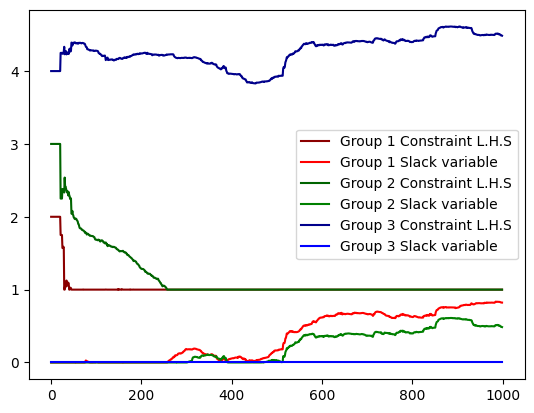

In [385]:
plt.plot(groups[0], c = "darkred", label = "Group 1 Constraint L.H.S")
plt.plot(slack_groups[0], c = "red", label = "Group 1 Slack variable")
plt.plot(groups[1], c = "darkgreen", label = "Group 2 Constraint L.H.S")
plt.plot(slack_groups[1], c = "green", label = "Group 2 Slack variable")
plt.plot(groups[2], c = "darkblue", label = "Group 3 Constraint L.H.S")
plt.plot(slack_groups[2], c = "blue", label = "Group 3 Slack variable")
plt.legend()
plt.show

compares the solutions from Gurobi's log file with the stored solutions

In [50]:
df = pd.read_csv("./tests/model_write/" + file_name + "_out501.sol", sep = " ")

In [51]:
last_solution_gurobi = df['Solution'][1:].to_numpy(dtype=float)

In [52]:
last_solution_gurobi_Z = np.concatenate((last_solution_gurobi[:K], last_solution_gurobi[K + constrs_len - 1:]))

In [53]:
last_solution_gurobi_slackness = last_solution_gurobi[K:K + constrs_len - 1]

In [54]:
np.allclose(last_solution_gurobi_slackness, slacks[500], atol = 1e-3)

True

In [55]:
np.allclose(last_solution_gurobi_Z, solutions[500][:last_solution_gurobi_Z.shape[0]], atol = 1e-3)

True

## Visualizations

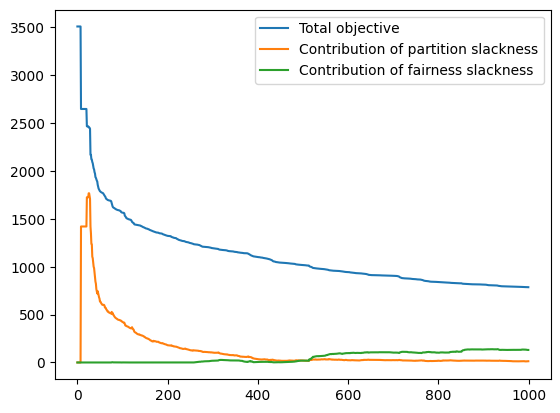

In [386]:
partition_slacks = [20 * sum(i[:n]) for i in slacks]
fairness_slacks = [100 * sum(i[n:]) for i in slacks]
plt.plot(objectives, label = "Total objective")
plt.plot(partition_slacks, label = "Contribution of partition slackness")
plt.plot(fairness_slacks, label = "Contribution of fairness slackness")
plt.legend()
plt.show()

In [230]:
cmap = sns.cm.rocket_r

In [231]:
fig = plt.figure(dpi = 1000)
sns.heatmap(solutions,cmap = cmap,vmax = 0.1)
fig.savefig("./tests/images/heatmap_"+ file_name +".png")
plt.close()

In [56]:
def create_df(solution):
    indices = list(range(len(solution)))
    indices_sorted = sorted(indices,key= lambda i : -solution[i])
    solutions_sorted = np.array(solution)[indices_sorted]
    fairness_rep = [tuple(c[n:n+l]) for c in clusters[indices_sorted]]
    df = pd.DataFrame({"Cluster Number": indices_sorted, 
                        "Solution": solutions_sorted,
                        "Cluster cost": np.array(distances)[indices_sorted], 
                        "Size of cluster": np.sum(np.array(clusters)[indices_sorted,:n],axis = 1),
                        "Fairness": fairness_rep})
    
    coverages,overlaps = coverage(list(df['Cluster Number']))
    df['coverage'] = coverages
    df['overlap'] = overlaps
    
    return df

In [57]:
def coverage(cluster_nums):
    cover = np.zeros(n)
    coverages = []
    overlaps = []
    for i in cluster_nums:
        cover += clusters[i][:n]
        coverage = 0
        overlap = 0
        for i in cover:
            if i > 0:
                coverage += 1
            if i > 1:
                overlap += i - 1
        coverages.append(coverage)
        overlaps.append(overlap)
    return coverages,overlaps

In [58]:
df = create_df(solutions[-1])

In [59]:
df[:20]

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness,coverage,overlap
0,4891,0.65305,34.312407,24.0,"(0.0, 0.0, 1.0)",24,0.0
1,8018,0.36538,68.255547,42.0,"(0.0, 0.0, 1.0)",66,0.0
2,6948,0.24385,35.991562,26.0,"(0.0, 0.0, 1.0)",92,0.0
3,5795,0.19067,153.832743,41.0,"(0.0, 0.0, 1.0)",109,24.0
4,7771,0.16965,115.546333,41.0,"(0.0, 0.0, 1.0)",138,36.0
5,6906,0.15837,81.923156,16.0,"(1.0, 1.0, 0.0)",138,52.0
6,6732,0.15190,90.552838,46.0,"(0.0, 0.0, 1.0)",183,53.0
7,5728,0.14191,63.848650,40.0,"(0.0, 0.0, 1.0)",189,87.0
8,4992,0.14137,40.790274,27.0,"(0.0, 0.0, 1.0)",189,114.0
9,7809,0.13974,175.190601,51.0,"(0.0, 0.0, 1.0)",191,163.0


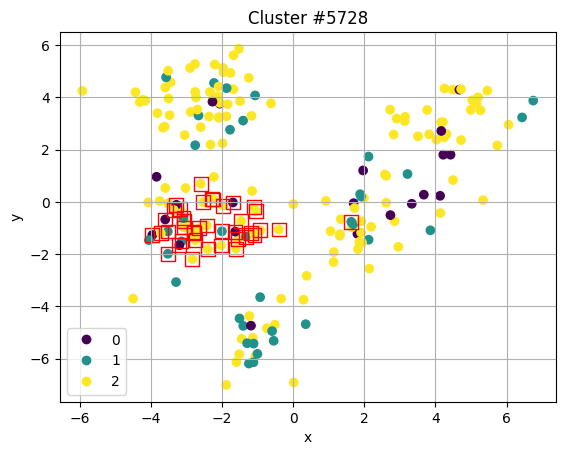

In [80]:
cluster_num = 5728
cluster_x = []
cluster_y = []
for i,j in enumerate(clusters[cluster_num][:n]):
    if j == 1:
        cluster_x.append(X[:,0][i])
        cluster_y.append(X[:,1][i])

scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.scatter(cluster_x,cluster_y,marker="s",edgecolors="r",facecolors='none',s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster #' + str(cluster_num))
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
plt.show()

1. lower bound , reduced costs, of pricing problem evolve over iterations
2. number of points in the cluster
3. fix a cluster and then move to a smaller problem, for all other clusters, change corresponding rows to 0 but keep the rest
4. cluster generation after bumping penalty to 1000

## Parameters

In [60]:
Zvars = model.getVars()[:K] + model.getVars()[K + constrs_len-1:]
Slack_vars_partition = model.getVars()[K : K + n]
Slack_vars_represent = model.getVars()[K + n : K + n + l]

In [61]:
len(Zvars) + len(Slack_vars_partition) + len(Slack_vars_represent) == len(model.getVars())

True

In [62]:
objective = gp.quicksum(Zvars[i] * dist_gurobi[i] for i in range(len(Zvars))) + \
    gp.quicksum(i * 1000 for i in Slack_vars_partition) + \
    gp.quicksum(i * 1000 for i in Slack_vars_represent)
model.setObjective(objective, GRB.MINIMIZE)
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 204 rows, 9587 columns and 794929 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
LP warm-start: use basis


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -9.7833261e+37   5.842743e+35   3.057289e+06      0s
    1843    9.1214087e+02   2.376087e-02   0.000000e+00      5s
    1855    9.1214831e+02   0.000000e+00   0.000000e+00      5s

Solved in 1855 iterations and 5.30 seconds (4.39 work units)
Optimal objective  9.121483104e+02


In [72]:
# [var.X for var in Slack_vars_partition]

In [63]:
sum(var.X for var in Slack_vars_partition) == 0, sum(var.X for var in Slack_vars_represent) == 0

(True, True)

In [64]:
solution_no_slack = np.array([z.X for z in Zvars])

In [65]:
np.allclose(np.ones(n),[clusters[:len(solution_no_slack),i] @ solution_no_slack for i in range(n)])

True

In [66]:
for i in range(n,n+l):
    print(solution_no_slack @ clusters[:solution_no_slack.shape[0],i])

1.0
1.0
3.9137174954378153


In [69]:
df2 = create_df(solution_no_slack)

In [70]:
df2[:20]

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness,coverage,overlap
0,2,0.468874,17.206204,2.0,"(1.0, 1.0, 0.0)",2,0.0
1,4891,0.396330,34.312407,24.0,"(0.0, 0.0, 1.0)",26,0.0
2,5795,0.170712,153.832743,41.0,"(0.0, 0.0, 1.0)",67,0.0
3,6906,0.112113,81.923156,16.0,"(1.0, 1.0, 0.0)",76,7.0
4,6732,0.109275,90.552838,46.0,"(0.0, 0.0, 1.0)",122,7.0
5,6725,0.096784,128.153032,50.0,"(0.0, 0.0, 1.0)",133,46.0
6,6916,0.096208,67.763733,14.0,"(1.0, 1.0, 0.0)",134,59.0
7,5201,0.084621,40.075361,2.0,"(1.0, 1.0, 0.0)",135,60.0
8,6087,0.080534,190.302710,56.0,"(0.0, 0.0, 1.0)",142,109.0
9,8428,0.074885,181.348195,44.0,"(0.0, 0.0, 1.0)",147,148.0


In [284]:
c2 = [var.obj for var in model.getVars()]
c2 == c

In [76]:
def get_nonzeros(l):
    res = []
    for i,j in enumerate(l):
        if j != 0:
            res.append(i)
    #print(l)
    print(res)